# Module 2 

#  Data Visualization and Technical Analysis

Importing libraries

In [1]:
import pandas as pd  #data-wrangling libraray
import numpy as np #Scientific computing library
import matplotlib.pyplot as plt #data-visualization library
import seaborn as sns #data-visualization library

In [2]:
#Importing matplotlib and setting up ggplot as style
import matplotlib
matplotlib.style.use('ggplot')

## 2.1 

Loading dataset

In [3]:
df = pd.read_csv('Saved Datasets/week2.csv')

In [4]:
#First five rows of our dataframe
df.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Price * Volume,Day_Perc_Change,Trend
0,0,INFY,EQ,2017-05-15,964.25,963.5,963.50,949.10,953.25,951.55,...,3648582,3.471580e+09,75335,3052819,83.67,5,2017,3.471808e+09,0.000000,Slight or No change
1,1,INFY,EQ,2017-05-16,951.55,953.1,960.15,946.95,956.00,955.00,...,3065084,2.920775e+09,71808,1858063,60.62,5,2017,2.927155e+09,0.362566,Slight or No change
2,2,INFY,EQ,2017-05-17,955.00,951.6,958.45,943.85,952.90,952.80,...,1457754,1.384110e+09,75429,792251,54.35,5,2017,1.388948e+09,-0.230366,Slight or No change
3,3,INFY,EQ,2017-05-18,952.80,943.0,973.90,942.85,960.25,961.75,...,4028924,3.878282e+09,120990,2309450,57.32,5,2017,3.874818e+09,0.939337,Slight positive
4,4,INFY,EQ,2017-05-19,961.75,961.5,962.70,947.85,957.40,957.95,...,2128698,2.031155e+09,88897,1457747,68.48,5,2017,2.039186e+09,-0.395113,Slight or No change


In [5]:
#Removing column Unnamed: 0 from our dataframe
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
#Datatype of each column
df.dtypes

Symbol                     object
Series                     object
Date                       object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
Month                       int64
Year                        int64
Price * Volume            float64
Day_Perc_Change           float64
Trend                      object
dtype: object

In [7]:
#Converting datatype of Date column to datetime64(ns)
df['Date'] = df['Date'].astype('datetime64')

In [8]:
#Setting up Date as an index
df.set_index('Date', inplace = True)

Text(0, 0.5, 'Close Price')

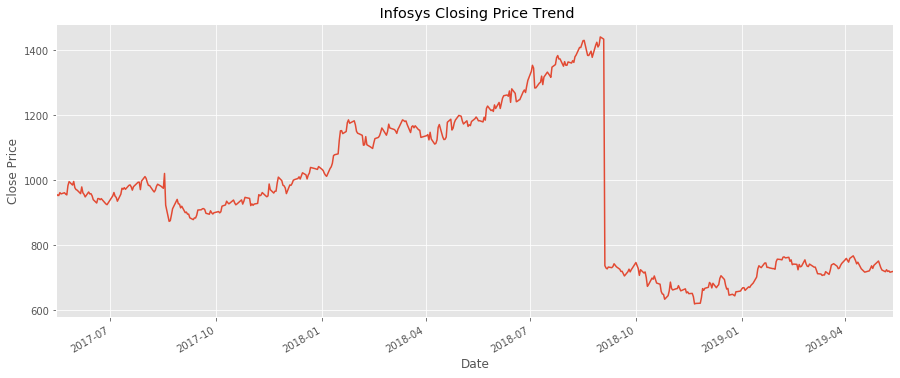

In [9]:
#Line chart of closing price
df['Close Price'].plot(kind = 'line', figsize = (15, 6))
plt.title(" Infosys Closing Price Trend")
plt.xlabel('Date')
plt.ylabel('Close Price')

There has been a drastic fall in the shares price of the company.

In [10]:
#Date of price  drop
drop_date = df['Day_Perc_Change'].idxmin()
drop_date

Timestamp('2018-09-04 00:00:00')

The massive price drop occurs on 4th September 2018. Infosys Limited has considered and approved Bonus at the ratio of 1:1 i.e 1 bonus share issued at Rs.0 for every share held. 

When a bonus is issued, the share price drops, in this case by a factor of 2 (Adjustment factor for Bonus issue of A:B is defined as (A+B)/B. In case of INFY, the adjustment factor will be (1+1)/1 = 2, since the bonus issue ratio is 1:1). So, if  INFY is held at an average price of 1400, the price of each share after bonus adjustment will be 700.

One share at Rs.0 for every share held at Rs 1400 will be given, thereby maintaining the overall investment value. Bonus issue only increases liquidity and not investment value.

## 2.2

Text(0, 0.5, 'Percentage')

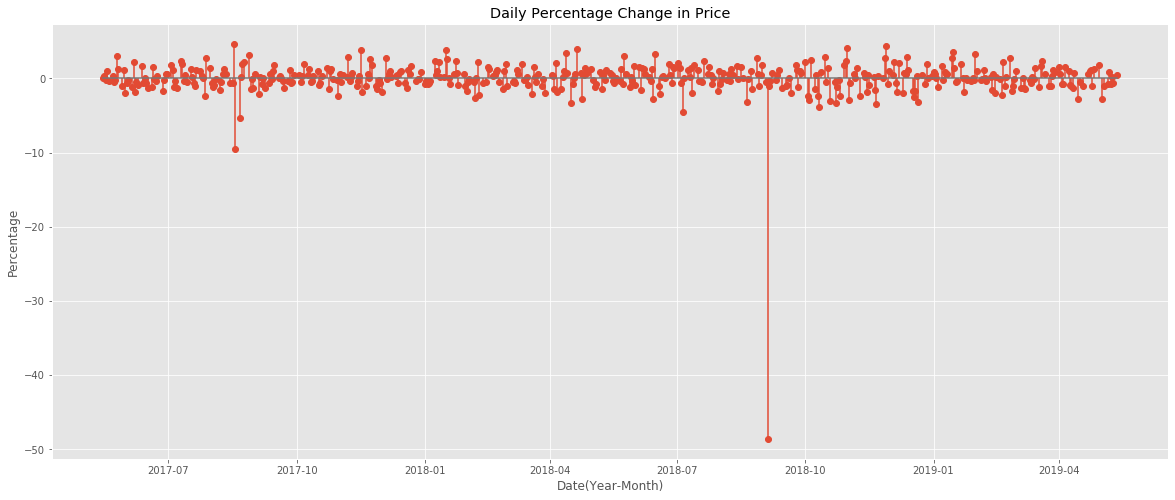

In [11]:
#Stem Plot for Daily Percentage Change
plt.figure(figsize = (20, 8))
plt.stem(df.index.tolist(), df['Day_Perc_Change'], use_line_collection = True)
plt.title('Daily Percentage Change in Price')
plt.xlabel('Date(Year-Month)')
plt.ylabel('Percentage')

Stem Plot also confirms that the largest daily percentage change in the price of infosys shares occur on 4th September 2018 of 50 percent approximately.

## 2.3 

Text(0, 0.5, 'Volume (10^7)')

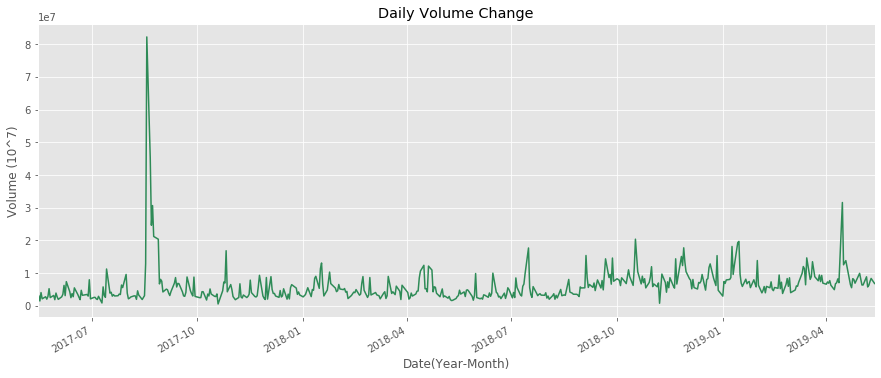

In [12]:
#Setting up figure size
plt.figure(figsize = (15, 6))

#Creating Line Plot of Daily Volumes
df['Total Traded Quantity'].plot(kind = 'line', color = 'seagreen')
plt.title('Daily Volume Change')
plt.xlabel('Date(Year-Month)')
plt.ylabel('Volume (10^7)')

In [13]:
#Normalization of Total Traded Quantity to get values in range[0-1]
norm_volume = df['Total Traded Quantity'] / df['Total Traded Quantity'].max()

#Normalization of Daily Percentage
norm_percentage = df['Day_Perc_Change'] / 100


Text(0.5, 0, 'Date(Year-Month)')

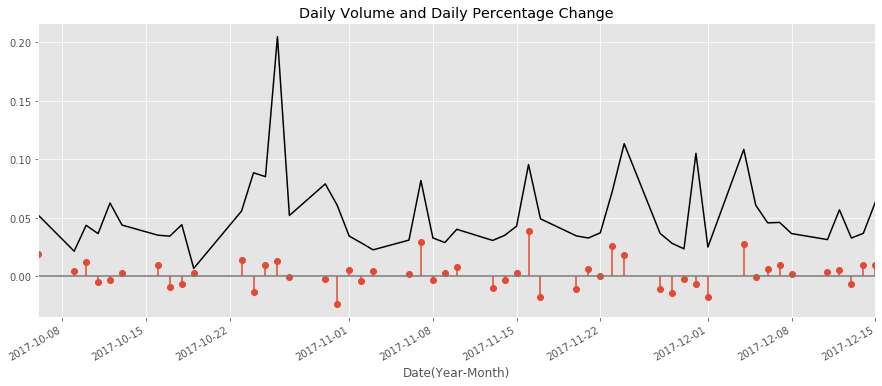

In [14]:
#Comparision of line plot of Volume(Total Traded Quantity) and Stem Plot of Daily Percentage Change
#Comparing Daily Volume and Daily Percentage Change

#Setting figure size
plt.figure(figsize = (15, 6))
#Creating stem plot
ax1 = plt.stem(norm_percentage.index.tolist()[100:150], norm_percentage[100:150], use_line_collection = True)
norm_volume[100:150].plot(kind = 'line', color = 'black' )
plt.title('Daily Volume and Daily Percentage Change')
plt.xlabel('Date(Year-Month)')

The above plot shows that there is inverse relationship between the daily volumes (Total Traded Quantiity) and Daily Percentage Change of Price for the given stock.

## 2.4

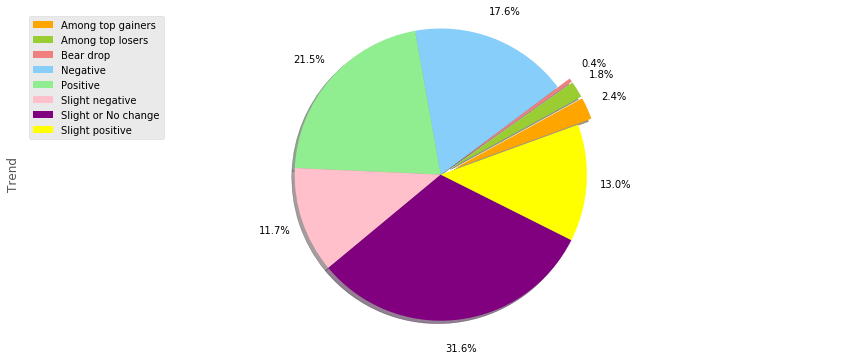

In [15]:
#Pie Chart of Trend feature

#Grouping of data on Trend feature
trend_gp = df.groupby('Trend')[['Trend']].count()

#ratio for each trend with which to offset each wedge.
explode_list = [0.1, 0.1, 0.1, 0.0, 0.0, 0, 0, 0]
#Color of each wedge
colors_list = ['orange', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'purple', 'yellow']
#Pie-Chart
trend_gp['Trend'].plot(kind = 'pie', 
             figsize = (15, 6),
             autopct = '%1.1f%%',
             startangle = 20,
             shadow = True,
             labels=None,         # turn off labels on pie chart
             pctdistance=1.20,
             explode = explode_list,
             colors = colors_list) 

plt.axis('equal') 

# add legend
plt.legend(labels=trend_gp.index, loc='upper left') 

plt.show()

According to our dataset 31.6% of the days shares price has seen slight or no change,21.5% of the days positive change, 13% of the days slight positive change, 17.6% of the days negative change. 2.4% of the days Infosys's shares are among top ganers and 1.8% of the days top losers. It has seen 0.4% of days as Bear drop.

Text(0, 0.5, 'Total Traded Quantity')

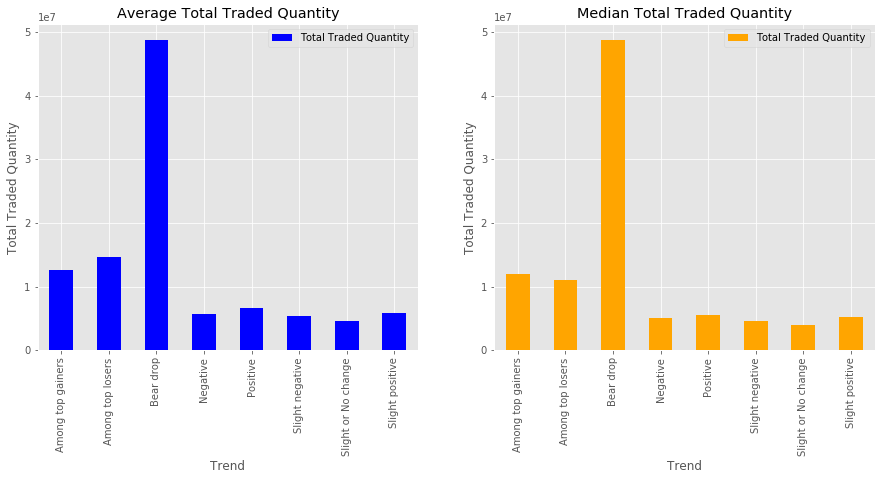

In [16]:
#Average and Median Volumes on the basis of trends

#Setting up figure size
plt.figure(figsize = (15, 6))

#Creating subplots
ax0 = plt.subplot(1, 2, 1)
ax1 = plt.subplot(1, 2, 2)

#Grouping up data on trend column
trend_gp = df.groupby('Trend')[['Total Traded Quantity']]

#Calculating average
trend_gp_avg = trend_gp.mean()

#Plotting trend_gp_avg
ax0 = trend_gp_avg.plot(kind = 'bar', color = 'blue',ax = ax0)
ax0.set_title('Average Total Traded Quantity')
ax0.set_xlabel('Trend')
ax0.set_ylabel('Total Traded Quantity')


#Calculating median
trend_gp_median = trend_gp.median()

#Plotting trend_gp_avg
ax1 = trend_gp_median.plot(kind = 'bar', color = 'orange',ax = ax1)
ax1.set_title('Median Total Traded Quantity')
ax1.set_xlabel('Trend')
ax1.set_ylabel('Total Traded Quantity')

The above two plot depicts that the low trade of shares occur when there is very small change in their stock price and large trade happens when price drop is large.

## 2.5

Text(0.5, 0, 'Daily Percentage Change')

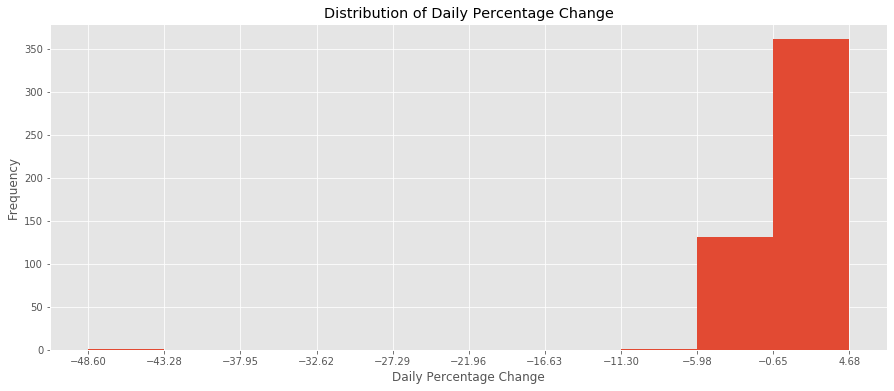

In [17]:
#Histogram of daily percentage change

#Creating bins
count, bin_edges = np.histogram(df['Day_Perc_Change'], 10)

#Creating Histogram
df['Day_Perc_Change'].plot(kind = 'hist', xticks = bin_edges, figsize = (15, 6))
plt.title('Distribution of Daily Percentage Change')
plt.xlabel('Daily Percentage Change')

Histogram depicts that the shares of Infosys has seen bear drop in their prices very small number of times.

## 2.6

In [20]:
#Loading 5 companys's stocks

df1 = pd.read_csv('Datasets\Small_Cap\JETAIRWAYS.csv')
df2 = pd.read_csv('Datasets\Small_Cap\FORTIS.csv')
df3 = pd.read_csv('Datasets\Small_Cap\PVR.csv')
df4 = pd.read_csv('Datasets\Small_Cap\JKLAKSHMI.csv')
df5 = pd.read_csv('Datasets\Small_Cap\BAJAJELEC.csv')

In [21]:
#Data Processing
df1 = df1[df1['Series'] == 'EQ']
df2 = df2[df2['Series'] == 'EQ']
df3 = df3[df3['Series'] == 'EQ']
df4 = df4[df4['Series'] == 'EQ']
df5 = df5[df5['Series'] == 'EQ']

In [22]:
#Creating df_price containing close P
df_price = pd.concat([df1['Close Price'], df2['Close Price'], df3['Close Price'], df4['Close Price'], df5['Close Price']],
                     axis = 1)

In [23]:
#Droping rows with missing values
df_price.dropna(inplace = True)

#Renaming columns
df_price.columns = ['Jetairways', 'Fortis', 'Pvr', 'Jklakshmi', 'Bajajelec']


In [24]:
#Creating Dataframe consisting of percentage changes
df_perc_change = pd.concat([df_price['Jetairways'].pct_change(),df_price['Fortis'].pct_change(), 
                            df_price['Pvr'].pct_change(), df_price['Jklakshmi'].pct_change(),
                            df_price['Bajajelec'].pct_change()], axis = 1)

In [25]:
#Replace missing values with 0
df_perc_change.replace(np.nan, 0, inplace = True)

Text(0.5, 1, 'Corelation and Diversification')

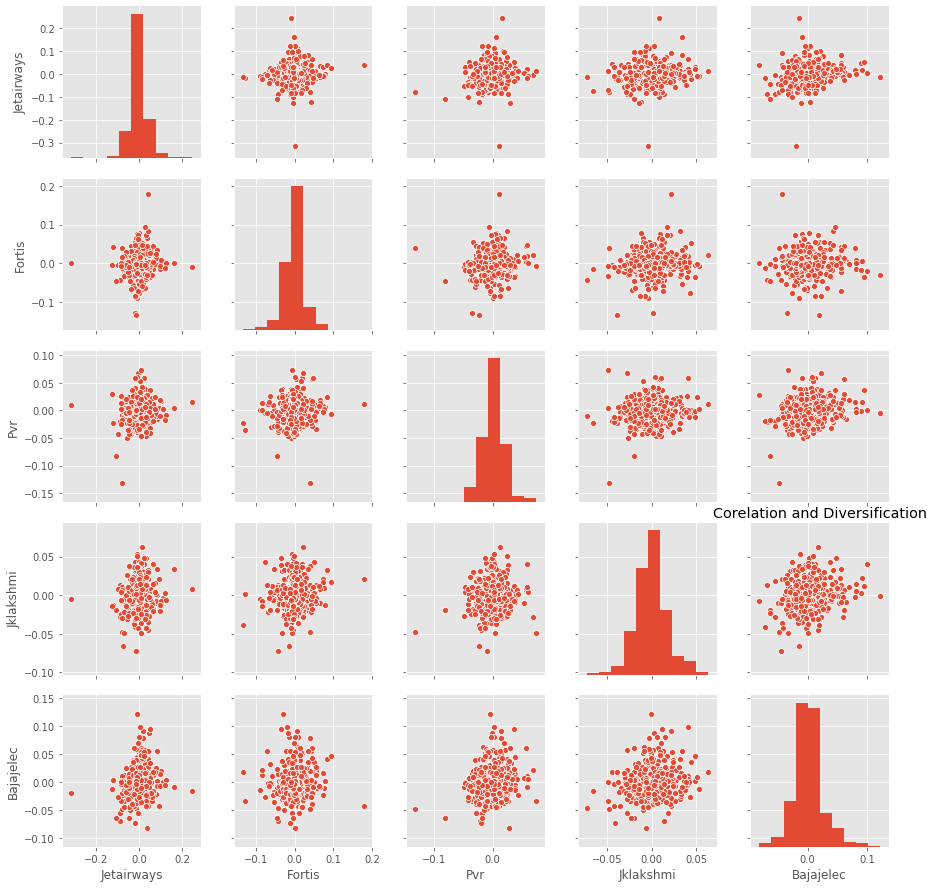

In [26]:
#Pairplot for correlation and diversification
sns.pairplot(df_perc_change)
plt.title('Corelation and Diversification')

## 2.7

Calculating voltality of INFY shares

Text(0, 0.5, 'Percentage')

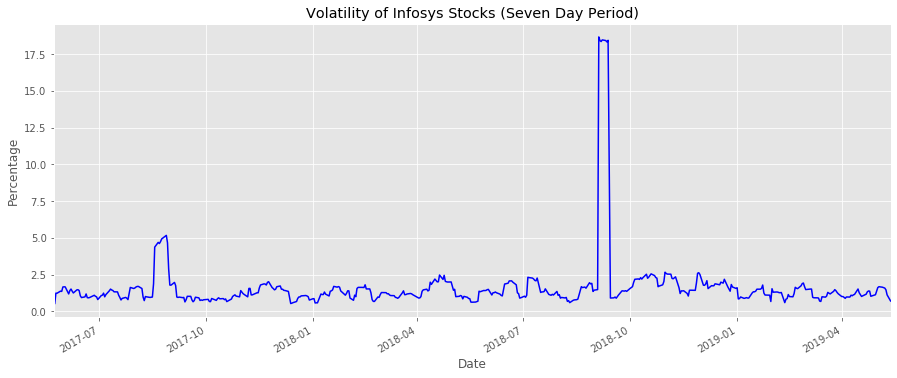

In [27]:
#Calculating voltality for 7 day percentage change
df_volatility = df['Day_Perc_Change'].rolling(7).std()

#Removing rows with missing values
df_volatility.dropna(inplace = True)

#Plotting voltality of shares
df_volatility.plot(kind = 'line', color = 'blue', figsize = (15,6))
plt.title('Volatility of Infosys Stocks (Seven Day Period)')
plt.xlabel('Date')
plt.ylabel('Percentage')

The stocks having volatility more than 1 percent are volatile and risky. The shares of Infosys most of the time are volatile and highest from 27th August 2018 to 4th September 2018. The reason is same that the Infosys limited has approved bonus of 1:1.

## 2.8

Calculating Beta coefficient of volatility

In [29]:
#Loading Nifty50
df_nifty = pd.read_csv('Datasets/Nifty50/Nifty50.csv')

#Converting Date into type Datetime64
df_nifty['Date'] = pd.to_datetime(df_nifty['Date'], dayfirst = True)

#Setting up Date as Index
df_nifty.set_index('Date', inplace = True)

#Adding Daily Percentage Column
df_nifty['Day_Perc_Change'] = df_nifty['Close'].pct_change() * 100

#Replacing missing value from Daily Percentage Change Column
df_nifty['Day_Perc_Change'].replace(np.nan, 0, inplace = True)

#Calculating volatiltiy of nifty50 market index
df_nifty_volatility = df_nifty['Day_Perc_Change'].rolling(7).std()

#Removing missing values from df_nifty_volatility
df_nifty_volatility.dropna(inplace = True)

#volatility 
volatility = pd.concat([df_volatility, df_nifty_volatility], axis = 1)

#Renaming columns
volatility.columns = ['Infosys', 'Nifty50']

Text(0, 0.5, 'Percentage')

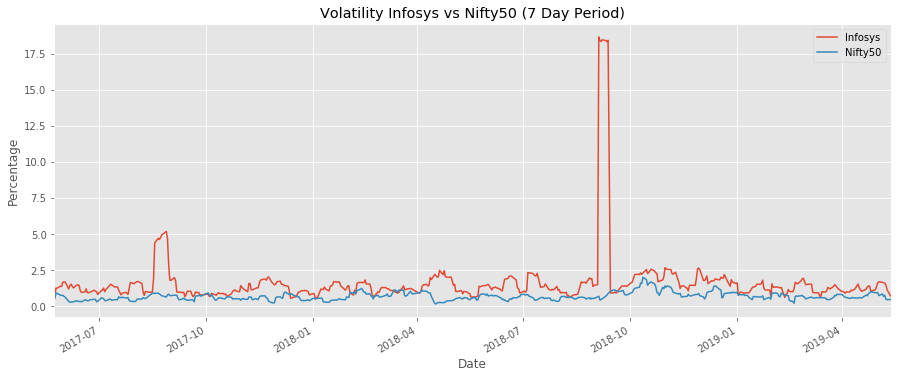

In [30]:
#Comparision Plot between volatility of price of Infosys and nify50 shares

volatility.plot(kind = 'line', figsize = (15, 6))
plt.title('Volatility Infosys vs Nifty50 (7 Day Period)')
plt.xlabel('Date')
plt.ylabel('Percentage')

The above figure depicts that the volatility of Insfosys shares are greater than the market index Nifty50's volatility. It shows that Beta coefficent is greater than 1

## 2.9

Trade Calls

In [31]:
#Trade Calls- Using simple moving averages

#21 day moving average
df_21day = df['Close Price'].rolling(21).mean()

#Removing missing values
df_21day.dropna(inplace = True)

#34 day moving average
df_34day = df['Close Price'].rolling(34).mean()

#Removing missing values
df_34day.dropna(inplace = True)

#Concatenating datframes
df_movavg = pd.concat([df_21day, df_34day], axis = 1)

#Renaming columns
df_movavg.columns = ['21day', '34day']

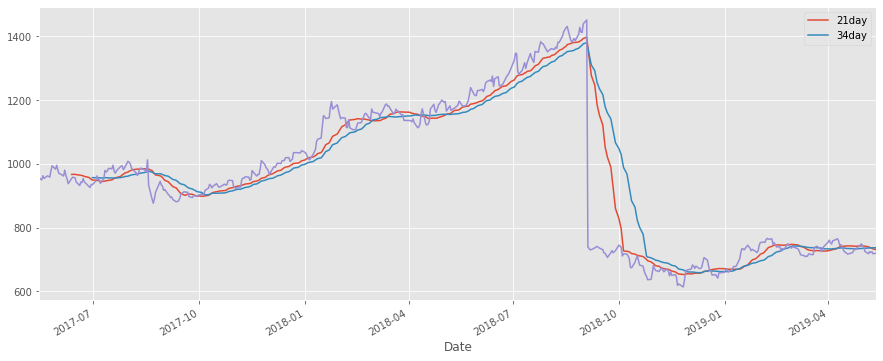

In [32]:
#Plotting moving averages with average price of stock

ax0 = df_movavg.plot(kind = 'line', figsize = (15, 6))
df['Average Price'].plot(kind = 'line', ax = ax0)

The trade call suggests buy when 21 day moving average crosses 34 day moving average and sell when 34 day moving average crosses 21 day moving average. 

## 2.10

Trade Calls - Using Bollinger Bands

In [33]:
#Trade Calls for 14 Days

#14 Days moving average
df_14day = df['Close Price'].rolling(14).mean()

#14 Days volatility
df_14sd = df['Close Price'].rolling(14).std()

#Removing missing values
df_14day.dropna(inplace = True)
df_14sd.dropna(inplace = True)

#Lower Standard Deviation
df_2sd_l = df_14day - 2 * df_14sd

#Upper Standard Deviation
df_2sd_u = df_14day + 2 * df_14sd

#Concatenating columns
df_trade = pd.concat([df_14day, df_2sd_l, df_2sd_u, df['Average Price']], axis = 1 )

#Dropping rows with missing data
df_trade.dropna(inplace = True)

#Renaming columns
df_trade.columns = ['14 Day average', 'Lower S.D.', 'Higher S.D.', 'Average Price']

Text(0.5, 1.0, 'Trade Calls using Bollinger Bands')

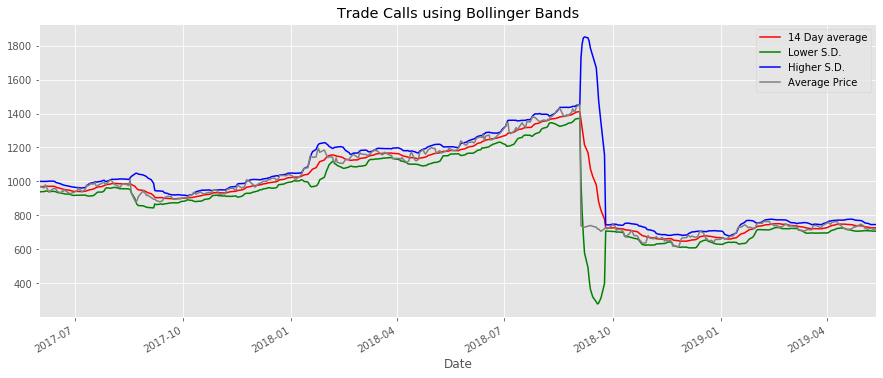

In [34]:
#Plotting

df_trade.plot(kind = 'line', figsize = (15, 6), color = ['Red', 'Green', 'Blue', 'Gray'])
plt.title('Trade Calls using Bollinger Bands')

Bollinger Bands® are a highly popular technique. Many traders believe the closer the prices move to the upper band, the more overbought the market, and the closer the prices move to the lower band, the more oversold the market.

Standard deviation is a measure of volatility, when the markets become more volatile the bands widen; during less volatile periods, the bands contract. 

Taking a deeper look at the above plot

Text(0.5, 1.0, 'Trade Calls using Bollinger Bands')

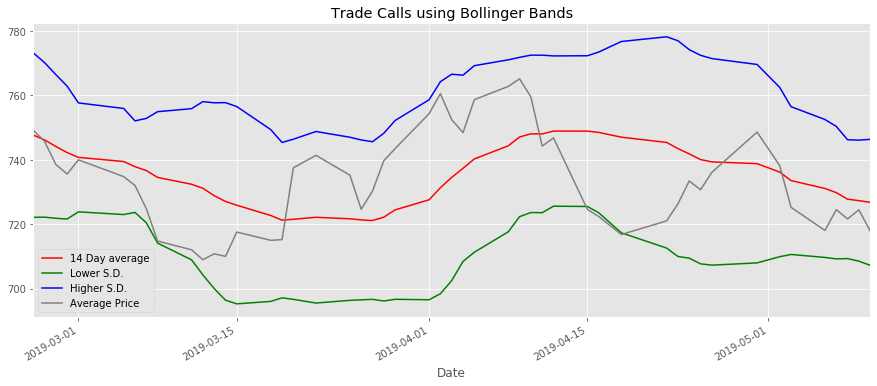

In [35]:
#Plot for the last fifty 14 Day long periods


df_trade.iloc[-50:-1].plot(kind = 'line', figsize = (15, 6), color = ['Red', 'Green', 'Blue', 'Gray'])
plt.title('Trade Calls using Bollinger Bands')

The above plot shows that the Bollinger Bands are holding the average prices of the stock in between them. The trade call is sell when average price is above moving average and close to upper boundary. The trade call is buy when average price is below moving average and close to lower boundary.

In [36]:
#Saving it to a csv file
df_trade.drop(['Average Price'], axis = 1, inplace = True)
df_bolinger = pd.concat([df, df_trade], axis = 1)
df_bolinger.dropna(inplace = True)
df_bolinger.to_csv('Saved Datasets/INFY_BOLINGER.csv')